In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/soil-measures/soil_measures.csv")
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [2]:
#The output informs that there aren't any missing values in our dataset
df.isna().sum().sort_values()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [3]:
#There is minute differences in the measure of cetranl tendencies, 
#but it is always better to center the data and there aren't any categorical data or string data so we don't need to encode anything
print(df.describe())
print(df['crop'].unique())
print(df['crop'].nunique())

                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
22


In [4]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

X = df.drop("crop", axis=1).values 
y = df["crop"].values

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
#From the output we can understand there isn't any class imbalance too,
#So we don't need to do stratification
unique_classes, class_counts = np.unique(y, return_counts=True)
class_counts_dict = dict(zip(unique_classes, class_counts))

print(class_counts_dict)
print(set(y_encoded))

{'apple': 100, 'banana': 100, 'blackgram': 100, 'chickpea': 100, 'coconut': 100, 'coffee': 100, 'cotton': 100, 'grapes': 100, 'jute': 100, 'kidneybeans': 100, 'lentil': 100, 'maize': 100, 'mango': 100, 'mothbeans': 100, 'mungbean': 100, 'muskmelon': 100, 'orange': 100, 'papaya': 100, 'pigeonpeas': 100, 'pomegranate': 100, 'rice': 100, 'watermelon': 100}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}


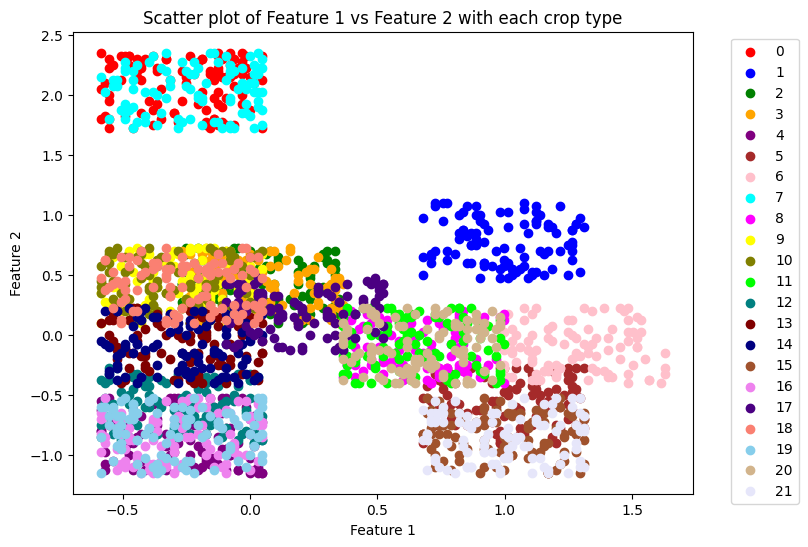

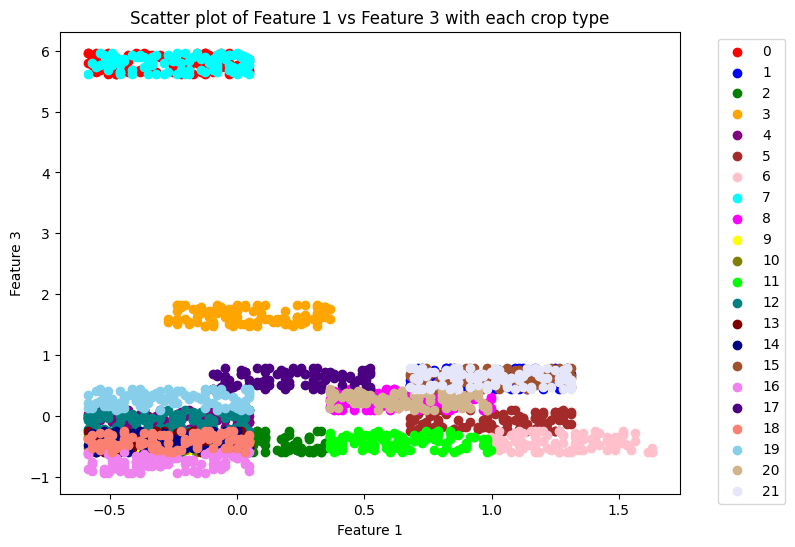

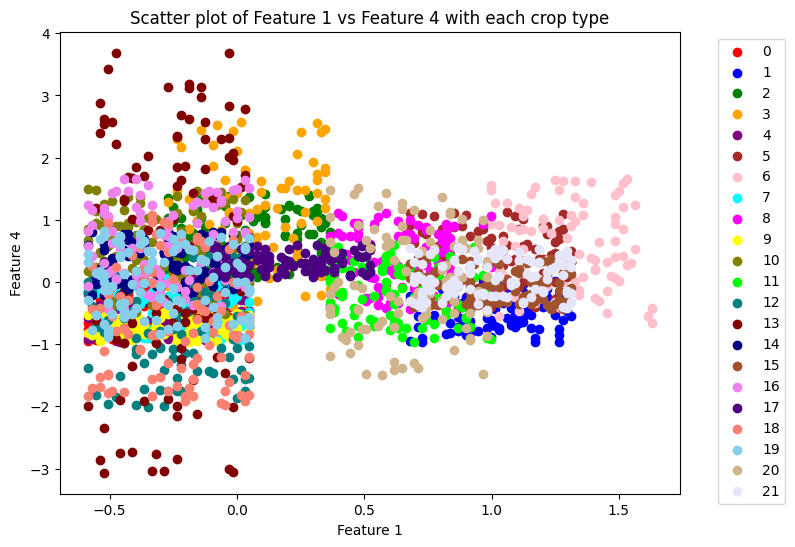

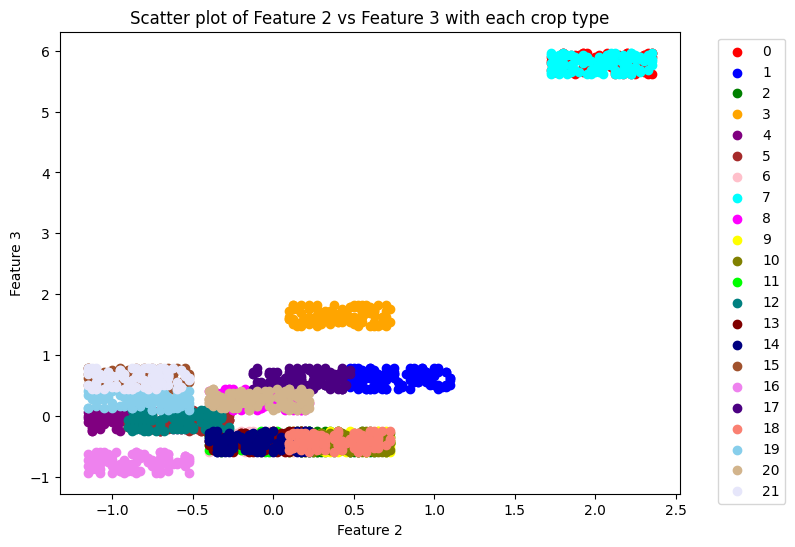

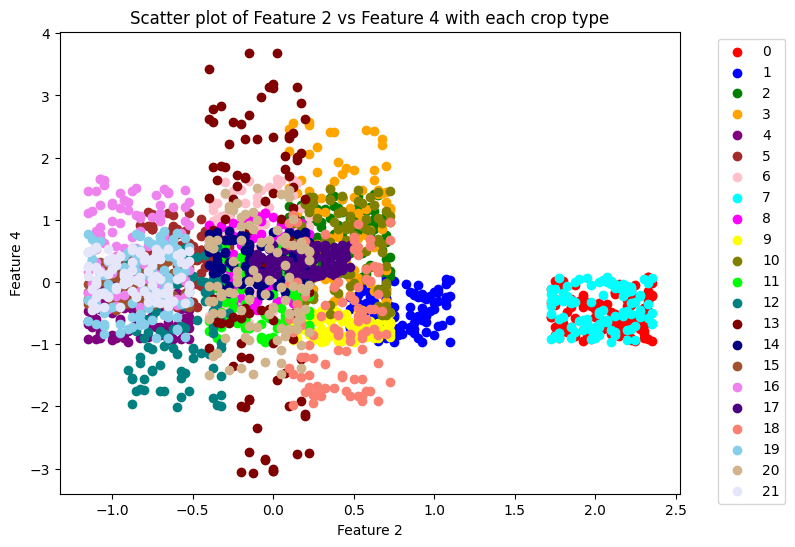

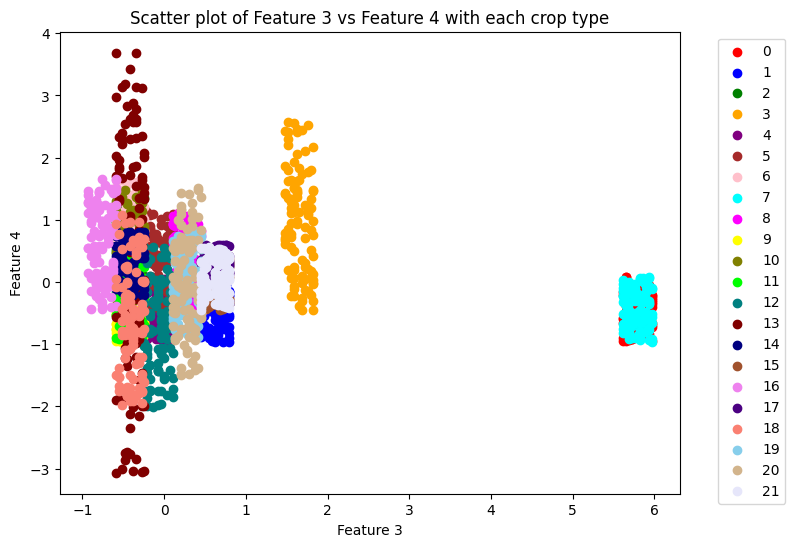

In [6]:
import matplotlib.pyplot as plt

colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'cyan',
    8: 'magenta',
    9: 'yellow',
    10: 'olive',
    11: 'lime',
    12: 'teal',
    13: 'maroon',
    14: 'navy',
    15: 'sienna',
    16: 'violet',
    17: 'indigo',
    18: 'salmon',
    19: 'skyblue',
    20: 'tan',
    21: 'lavender',
}

for i in range(len(X_scaled[0]) - 1):
    for j in range(i + 1, len(X_scaled[0])):
        plt.figure(figsize=(8, 6))
        for crop_type, color in colors.items():
            plt.scatter(X_scaled[y_encoded == crop_type, i], X_scaled[y_encoded == crop_type, j], label=crop_type, color=color)
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel(f'Feature {j+1}')
        plt.title(f'Scatter plot of Feature {i+1} vs Feature {j+1} with each crop type')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()


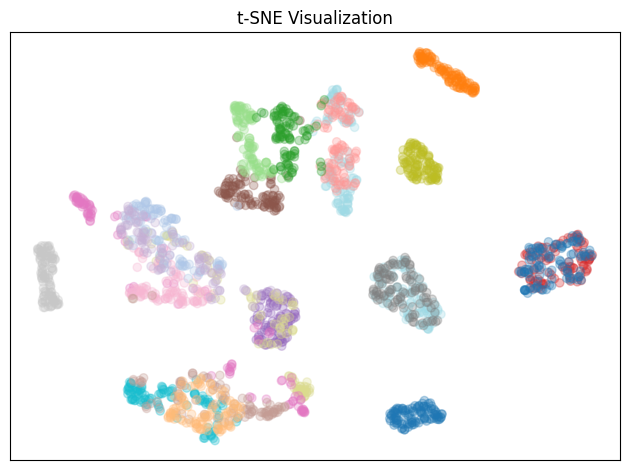

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE()
embeddings = tsne.fit_transform(X_scaled)
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_encoded, cmap='tab20', alpha=0.3)
plt.title("t-SNE Visualization")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, homogeneity_score, normalized_mutual_info_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering

Metrics for KMeans Clustering:
Silhouette Score: 0.5626764297485352
Calinski-Harabasz Index: 4679.141003159583
Homogeneity Score: 0.7072290277870814
Normalized Mutual Information (NMI): 0.7955373090310522
Davies-Bouldin Index (DBI): 0.6184762110745141



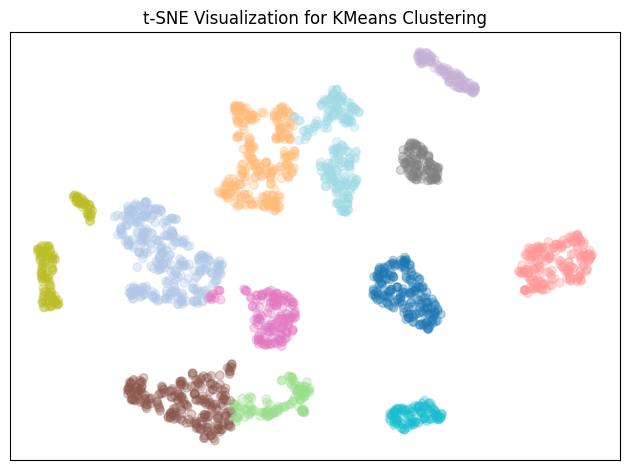

In [9]:
tsne = TSNE()
embeddings = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_init=22, n_clusters=12, tol=0.0001, random_state=116)
cluster_labels = kmeans.fit_predict(embeddings)

silhouette = silhouette_score(embeddings, cluster_labels)
ch_index = calinski_harabasz_score(embeddings, cluster_labels)
homogeneity = homogeneity_score(y_encoded, cluster_labels)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels)
db_index = davies_bouldin_score(embeddings, cluster_labels)

print("Metrics for KMeans Clustering:")
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {ch_index}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Davies-Bouldin Index (DBI): {db_index}")
print()

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='tab20', alpha=0.3)
plt.title("t-SNE Visualization for KMeans Clustering")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

Metrics for KMeans Clustering:
Silhouette Score: 0.5311954021453857
Calinski-Harabasz Index: 7258.091765846043
Homogeneity Score: 0.7670831203973709
Normalized Mutual Information (NMI): 0.7700146036143787
Davies-Bouldin Index (DBI): 0.695693364888575



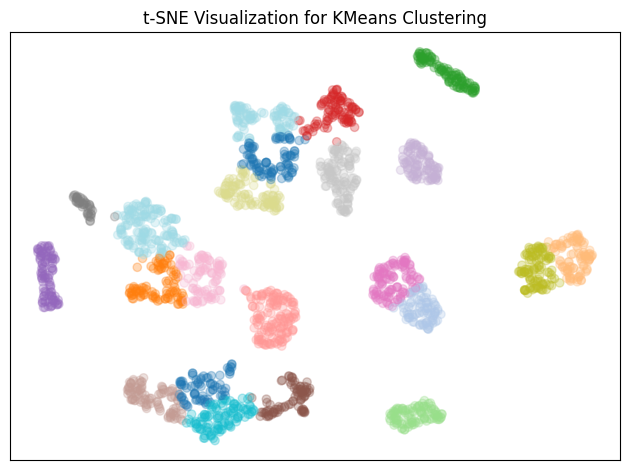

In [10]:
tsne = TSNE()
embeddings = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_init=22, n_clusters=22, tol=0.0001, random_state=116)
cluster_labels = kmeans.fit_predict(embeddings)

silhouette = silhouette_score(embeddings, cluster_labels)
ch_index = calinski_harabasz_score(embeddings, cluster_labels)
homogeneity = homogeneity_score(y_encoded, cluster_labels)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels)
db_index = davies_bouldin_score(embeddings, cluster_labels)

print("Metrics for KMeans Clustering:")
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {ch_index}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Davies-Bouldin Index (DBI): {db_index}")
print()

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='tab20', alpha=0.3)
plt.title("t-SNE Visualization for KMeans Clustering")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

Metrics for DBSCAN Clustering:
Silhouette Score: -0.0749625712633133
Calinski-Harabasz Index: 4.761984618267758
Homogeneity Score: 0.50353467248059
Normalized Mutual Information (NMI): 0.44035351788275406
Davies-Bouldin Index (DBI): 1.1381303382039185



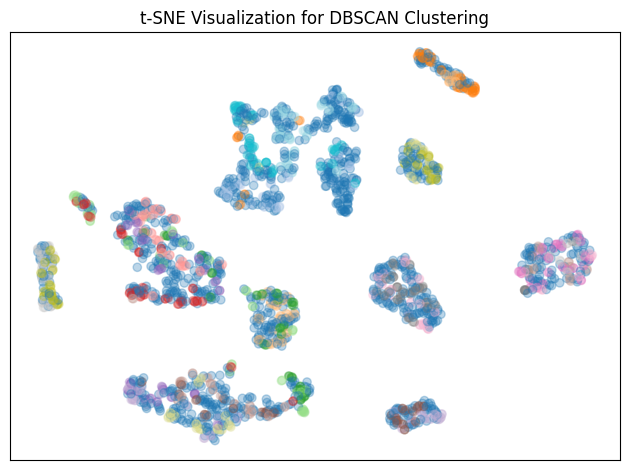

In [11]:
tsne = TSNE()
embeddings = tsne.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.4, min_samples=2)
cluster_labels = dbscan.fit_predict(embeddings)

silhouette = silhouette_score(embeddings, cluster_labels)
ch_index = calinski_harabasz_score(embeddings, cluster_labels)
homogeneity = homogeneity_score(y_encoded, cluster_labels)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels)
db_index = davies_bouldin_score(embeddings, cluster_labels)

print("Metrics for DBSCAN Clustering:")
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {ch_index}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Davies-Bouldin Index (DBI): {db_index}")
print()

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='tab20', alpha=0.3)
plt.title("t-SNE Visualization for DBSCAN Clustering")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

Metrics for GMM Clustering:
Silhouette Score: 0.5333335995674133
Calinski-Harabasz Index: 6741.244018444542
Homogeneity Score: 0.768223279764908
Normalized Mutual Information (NMI): 0.7759424086524881
Davies-Bouldin Index (DBI): 0.6738094689440832



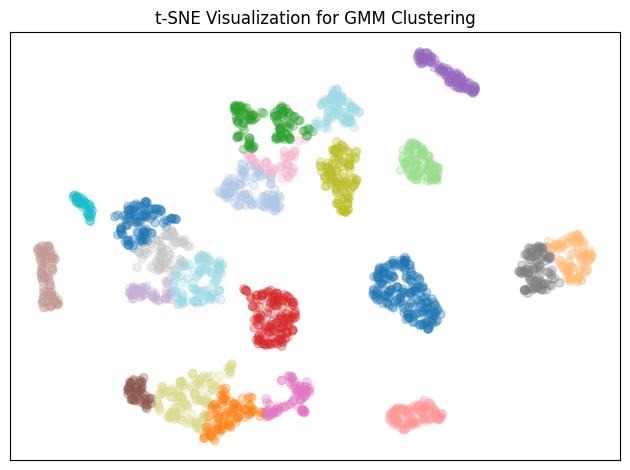

In [12]:
tsne = TSNE()
embeddings = tsne.fit_transform(X_scaled)

gmm = GaussianMixture(n_components= 22, covariance_type= 'spherical', random_state=116)
cluster_labels = gmm.fit_predict(embeddings)

silhouette = silhouette_score(embeddings, cluster_labels)
ch_index = calinski_harabasz_score(embeddings, cluster_labels)
homogeneity = homogeneity_score(y_encoded, cluster_labels)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels)
db_index = davies_bouldin_score(embeddings, cluster_labels)

print("Metrics for GMM Clustering:")
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {ch_index}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Davies-Bouldin Index (DBI): {db_index}")
print()

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='tab20', alpha=0.3)
plt.title("t-SNE Visualization for GMM Clustering")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()


Metrics for Agglomerative Clustering (n_clusters=10):
Silhouette Score: 0.5252397060394287
Calinski-Harabasz Index: 3914.505774225995
Homogeneity Score: 0.6696841961619883
Normalized Mutual Information (NMI): 0.7749819135871421
Davies-Bouldin Index (DBI): 0.7480618686629545



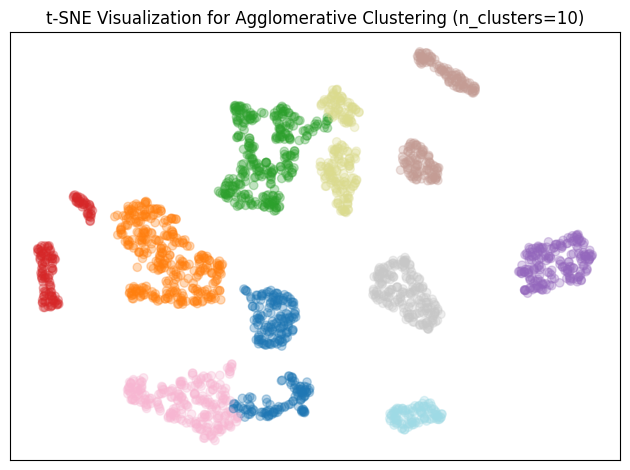

Metrics for Agglomerative Clustering (n_clusters=12):
Silhouette Score: 0.5233786702156067
Calinski-Harabasz Index: 4241.0335798308415
Homogeneity Score: 0.6955526852590582
Normalized Mutual Information (NMI): 0.7781515931914956
Davies-Bouldin Index (DBI): 0.6808244168736008



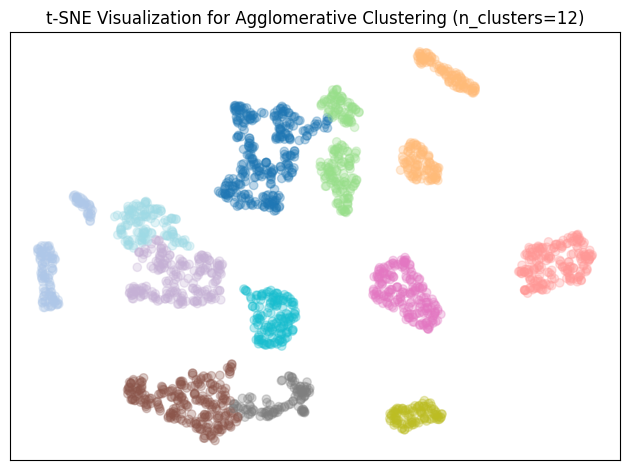

Metrics for Agglomerative Clustering (n_clusters=22):
Silhouette Score: 0.525530993938446
Calinski-Harabasz Index: 6751.702272017176
Homogeneity Score: 0.7632350426086384
Normalized Mutual Information (NMI): 0.7694987002468329
Davies-Bouldin Index (DBI): 0.66869973843348



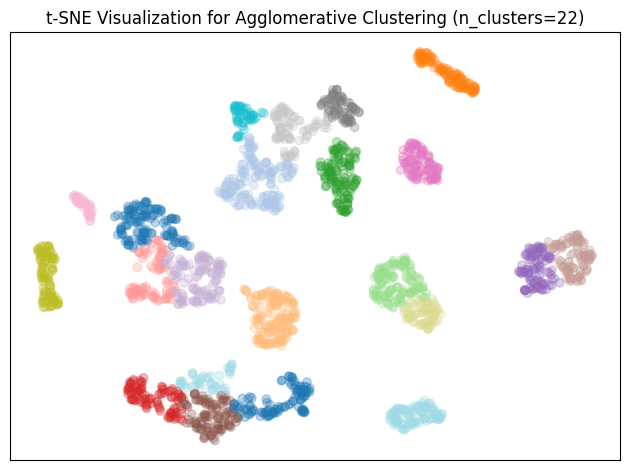

In [13]:
n_clusters_list = [ 10, 12, 22]  

tsne = TSNE()
embeddings = tsne.fit_transform(X_scaled)

for n_clusters in n_clusters_list:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric= 'manhattan', linkage= 'complete')
    cluster_labels = agg_clustering.fit_predict(embeddings)
    
    silhouette = silhouette_score(embeddings, cluster_labels)
    ch_index = calinski_harabasz_score(embeddings, cluster_labels)
    homogeneity = homogeneity_score(y_encoded, cluster_labels)
    nmi = normalized_mutual_info_score(y_encoded, cluster_labels)
    db_index = davies_bouldin_score(embeddings, cluster_labels)
    
    print(f"Metrics for Agglomerative Clustering (n_clusters={n_clusters}):")
    print(f"Silhouette Score: {silhouette}")
    print(f"Calinski-Harabasz Index: {ch_index}")
    print(f"Homogeneity Score: {homogeneity}")
    print(f"Normalized Mutual Information (NMI): {nmi}")
    print(f"Davies-Bouldin Index (DBI): {db_index}")
    print()

    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='tab20', alpha=0.3)
    plt.title(f"t-SNE Visualization for Agglomerative Clustering (n_clusters={n_clusters})")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

In [14]:
"""KMeans clustering with 22 clusters, GMM clustering and Agglomerative Clustering with 22 clusters exhibit relatively high silhouette scores, Calinski-Harabasz indices, Homogeneity Scores, and Normalized Mutual Information (NMI), indicating good clustering performance. Additionally, they both have moderate Davies-Bouldin Index (DBI) values, suggesting well-separated clusters. Therefore, these three algorithms are better performing although they have their own advantages and disadvantages of grouping compared to original t-SNE Visualization"""

'KMeans clustering with 22 clusters, GMM clustering and Agglomerative Clustering with 22 clusters exhibit relatively high silhouette scores, Calinski-Harabasz indices, Homogeneity Scores, and Normalized Mutual Information (NMI), indicating good clustering performance. Additionally, they both have moderate Davies-Bouldin Index (DBI) values, suggesting well-separated clusters. Therefore, these three algorithms are better performing although they have their own advantages and disadvantages of grouping compared to original t-SNE Visualization'